### EDA

In [1]:
#importing pandas library
import pandas as pd

#loading data
train = pd.read_csv('train.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking the NULL Values

In [2]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Graphical Analysis

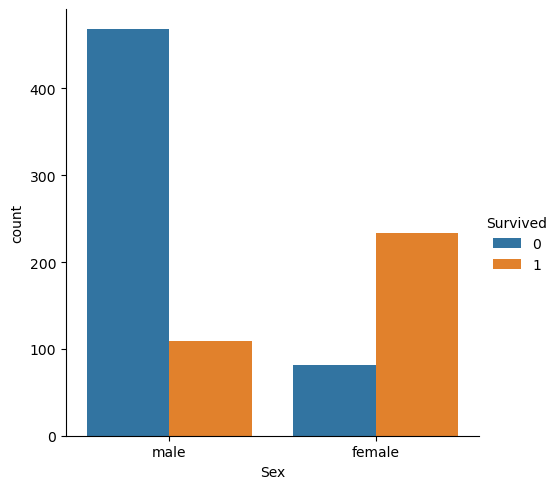

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot
sns.catplot(x='Sex', hue='Survived',
            kind='count', data = train)

### Pclass (Ordinal Feature) vs Survived

<Axes: xlabel='Survived', ylabel='Pclass'>

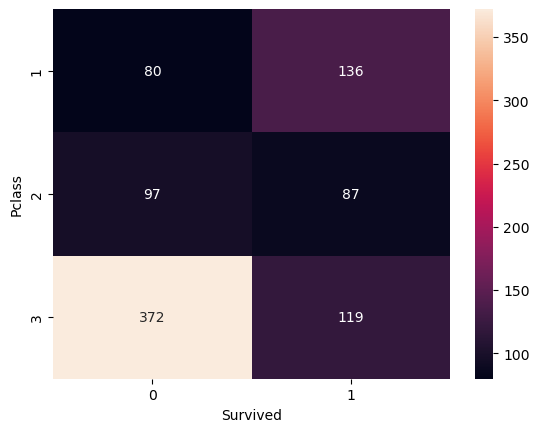

In [4]:
# Group the dataset by Pclass and Survived and then unstack them
group = train.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()

# Heatmap - Color encoded 2D representation of data
sns.heatmap(pclass_survived, annot = True, fmt = 'd')

### Age (Continuous Feature) vs Survived

<Axes: xlabel='Sex', ylabel='Age'>

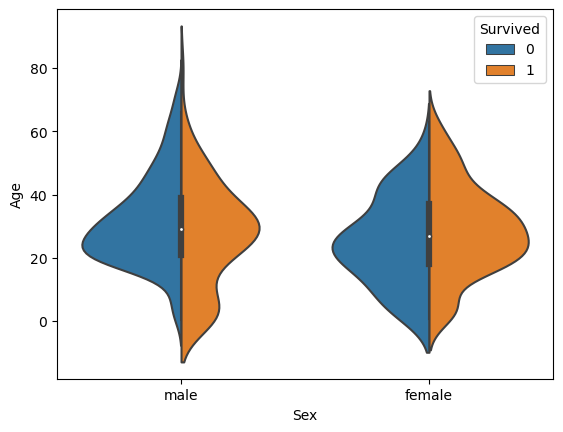

In [5]:
# Violinplot Displays distribution of data
# across all levels of a category
sns.violinplot(x='Sex', y='Age', hue='Survived',
               data= train, split= True)

The survival rate is:

- Good for children.
- High for women in the age range 20-50.
- Less for men as the age increases.

### Factor plot for Family_Size (Count Feature) and Family Size

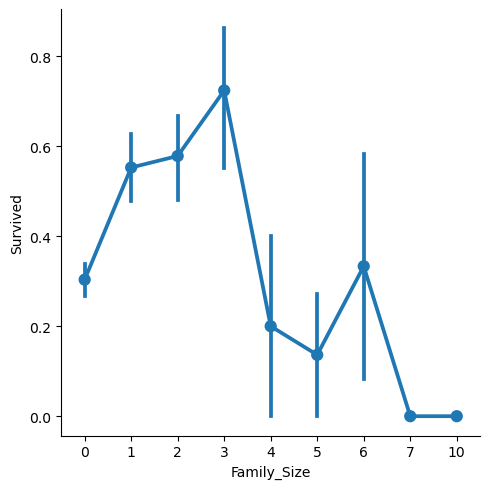

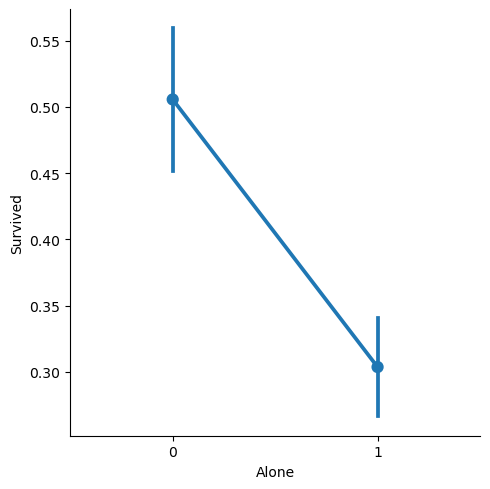

In [6]:
# Adding a column Family_Size
train['Family_Size'] = 0
train['Family_Size'] = train['Parch'] + train['SibSp']

# Adding a column Alone
train['Alone'] = 0
train.loc[train.Family_Size == 0, 'Alone'] = 1

# Factorplot for Family_Size
sns.catplot(x= 'Family_Size', y= 'Survived', data = train, kind= 'point')

# Factorplot for Alone
sns.catplot(x='Alone', y='Survived', data = train, kind= 'point')

Important observations:

- If a passenger is alone, the survival rate is less.
- If the family size is greater than 5, chances of survival decrease considerably.

### Bar Plot for Fare (Continuous Feature)

<Axes: xlabel='Fare_Range', ylabel='Survived'>

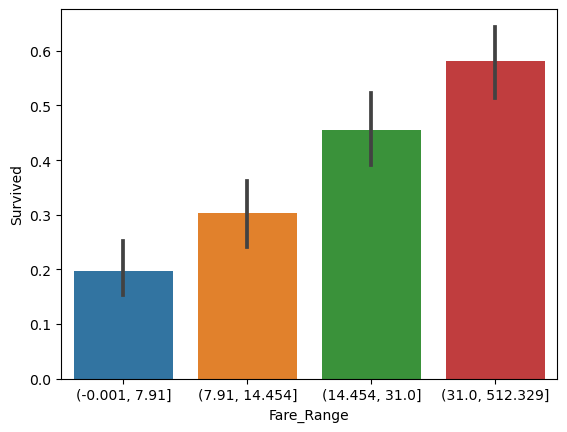

In [7]:
# Divide Fare into 4 bins
train['Fare_Range'] = pd.qcut(train['Fare'], 4)

# Barplot - Shows approximate values based on the height of bars
sns.barplot(x= 'Fare_Range', y= 'Survived',
            data = train)

### Categorical Count Plots for Embarked Feature

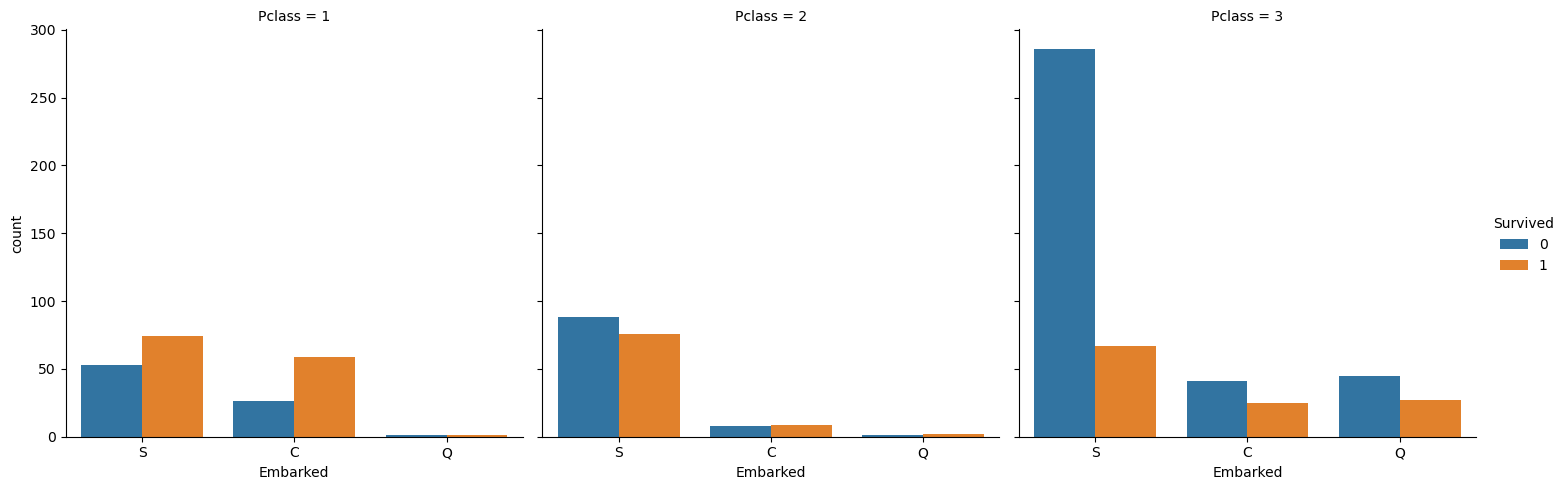

In [8]:
# Countplot
sns.catplot(x= 'Embarked', hue= 'Survived',
            kind= 'count', col= 'Pclass', data = train)

Some notable observations are:

- Majority of the passengers boarded from S. So, the missing values can be filled with S
- Majority of class 3 passengers boarded from Q
- S looks lucky for class 1 and 2 passengers compared to class 3

Conclusion :

- The columns that can be dropped are:
- PassengerId, Name, Ticket, Cabin: They are strings, cannot be categorized and don’t contribute much to the outcome.
- Age, Fare: Instead, the respective range columns are retained.
- The titanic data can be analyzed using many more graph techniques and also more column correlations, than, as described in this article.
- Once the EDA is completed, the resultant dataset can be used for predictions.

### Importing Libraries

In [9]:
import warnings
import numpy as np
plt.style.use('fivethirtyeight')
%matplotlib inline
warnings.filterwarnings('ignore')

In [10]:
test = pd.read_csv('test.csv')

# To know number of columns and rows
train.shape

(891, 15)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Family_Size  891 non-null    int64   
 13  Alone        891 non-null    int64   
 14  Fare_Range   891 non-null    category
dtypes: category(1), float64(2), int64(7), object(5)
memory usage: 98.7+ KB


In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_Size      0
Alone            0
Fare_Range       0
dtype: int64

### Visualization

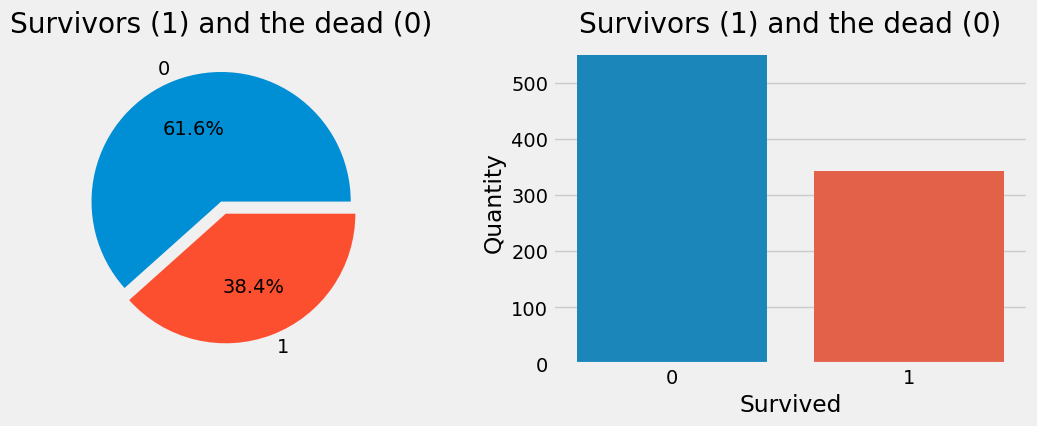

In [13]:
f, ax = plt.subplots(1,2, figsize=(12,4))
train['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survivors (1) and the dead (0)')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data = train, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survivors (1) and the dead (0)')
plt.show()

Sex Feature

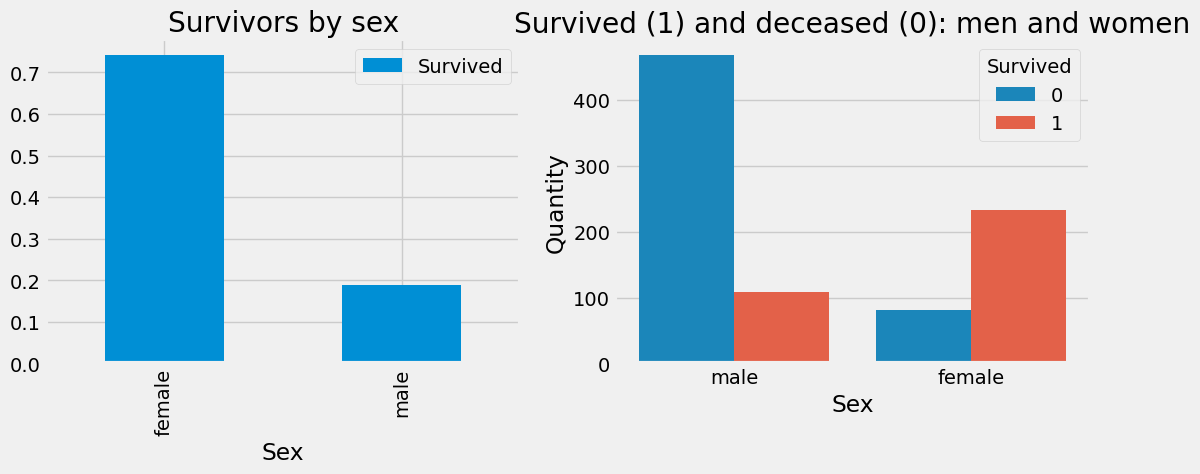

In [14]:
f, ax = plt.subplots(1,2, figsize=(12,4))
train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survivors by sex')
sns.countplot(x='Sex', hue= 'Survived', data= train, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survived (1) and deceased (0): men and women')
plt.show()

### Feature Engineering

In [15]:
# Create a new column cabinbool indicating
# if the cabin value was given or was NaN
train['CabinBool'] = (train['Cabin'].notnull().astype('int'))
test['CabinBool'] = (test['Cabin'].notnull().astype('int'))

# Delete the column 'Cabin' from test
# and train dataset
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [16]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [17]:
# replacing the missing values in
# the Embarked feature with S
train = train.fillna({"Embarked": "S"})

In [18]:
# sort the ages into logical categories
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager',
        'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins, labels= labels)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels= labels)

In the ‘title’ column for both the test and train set, we will categorize them into an equal number of classes. Then we will assign numerical values to the title for convenience of model training.



In [19]:
# create a combined group of both datasets
combine = [train, test]

# extract a title for each Name in the
# train and test datasets
for dataset in combine:
	dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

# replace various titles with more common names
for dataset in combine:
	dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
												'Don', 'Dr', 'Major',
												'Rev', 'Jonkheer', 'Dona'],
												'Rare')

	dataset['Title'] = dataset['Title'].replace(
		['Countess', 'Lady', 'Sir'], 'Royal')
	dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
	dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
	dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

# map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3,
				"Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
	dataset['Title'] = dataset['Title'].map(title_mapping)
	dataset['Title'] = dataset['Title'].fillna(0)


Now using the title information we can fill in the missing age values.

In [20]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() # Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() # Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() # Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() # Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() # Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() # Adult

age_title_mapping = {1: "Young Adult", 2: "Student",
					3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
	if train["AgeGroup"][x] == "Unknown":
		train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]

for x in range(len(test["AgeGroup"])):
	if test["AgeGroup"][x] == "Unknown":
		test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]


In [21]:
# map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3,
			'Student': 4, 'Young Adult': 5, 'Adult': 6,
			'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

# dropping the Age feature for now, might change
train = train.drop(['Age'], axis=1)
test = test.drop(['Age'], axis=1)

In [22]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [23]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [24]:
for x in range(len(test["Fare"])):
	if pd.isnull(test["Fare"][x]):
		pclass = test["Pclass"][x] # Pclass = 3
		test["Fare"][x] = round(
			train[train["Pclass"] == pclass]["Fare"].mean(), 4)

# map Fare values into groups of
# numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4,
							labels=[1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4,
						labels=[1, 2, 3, 4])

# drop Fare values
train = train.drop(['Fare'], axis=1)
test = test.drop(['Fare'], axis=1)

### Model Training

We will be using Random forest as the algorithm of choice to perform model training. Before that, we will split the data in an 80:20 ratio as a train-test split. For that, we will use the train_test_split() from the sklearn library.

In [25]:
from sklearn.model_selection import train_test_split

# Drop the Survived and PassengerId
# column from the trainset
predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(
	predictors, target, test_size=0.2, random_state=0)

In [26]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 140 to 684
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass       712 non-null    int64   
 1   Sex          712 non-null    int64   
 2   SibSp        712 non-null    int64   
 3   Parch        712 non-null    int64   
 4   Embarked     712 non-null    int64   
 5   Family_Size  712 non-null    int64   
 6   Alone        712 non-null    int64   
 7   Fare_Range   712 non-null    category
 8   CabinBool    712 non-null    int32   
 9   AgeGroup     712 non-null    float64 
 10  Title        712 non-null    int64   
 11  FareBand     712 non-null    category
dtypes: category(2), float64(1), int32(1), int64(8)
memory usage: 60.2 KB


In [27]:
x_train.describe(include='all')

,Pclass,Sex,SibSp,Parch,Embarked,Family_Size,Alone,Fare_Range,CabinBool,AgeGroup,Title,FareBand
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712,712.000000,712.000000,712.000000,712.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,4.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(31.0, 512.329]",NaN,NaN,NaN,4.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179,NaN,NaN,NaN,179.0
mean,2.317416,0.346910,0.529494,0.391854,1.360955,0.921348,0.603933,NaN,0.228933,4.627809,1.716292,NaN
std,0.833767,0.476321,1.140842,0.821368,0.641108,1.664385,0.489423,NaN,0.420441,1.377113,1.055886,NaN
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,1.000000,1.000000,NaN
25%,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,4.000000,1.000000,NaN
50%,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,0.000000,5.000000,1.000000,NaN
75%,3.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,6.000000,2.000000,NaN


In [28]:
x_trains = x_train.drop(['Fare_Range', 'FareBand'], axis=1)

In [29]:
x_trains.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 140 to 684
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       712 non-null    int64  
 1   Sex          712 non-null    int64  
 2   SibSp        712 non-null    int64  
 3   Parch        712 non-null    int64  
 4   Embarked     712 non-null    int64  
 5   Family_Size  712 non-null    int64  
 6   Alone        712 non-null    int64  
 7   CabinBool    712 non-null    int32  
 8   AgeGroup     712 non-null    float64
 9   Title        712 non-null    int64  
dtypes: float64(1), int32(1), int64(8)
memory usage: 58.4 KB


In [30]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 495 to 372
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass       179 non-null    int64   
 1   Sex          179 non-null    int64   
 2   SibSp        179 non-null    int64   
 3   Parch        179 non-null    int64   
 4   Embarked     179 non-null    int64   
 5   Family_Size  179 non-null    int64   
 6   Alone        179 non-null    int64   
 7   Fare_Range   179 non-null    category
 8   CabinBool    179 non-null    int32   
 9   AgeGroup     179 non-null    float64 
 10  Title        179 non-null    int64   
 11  FareBand     179 non-null    category
dtypes: category(2), float64(1), int32(1), int64(8)
memory usage: 15.5 KB


In [31]:
x_vals = x_val.drop(['Fare_Range', 'FareBand'], axis=1)

In [32]:
x_vals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 495 to 372
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       179 non-null    int64  
 1   Sex          179 non-null    int64  
 2   SibSp        179 non-null    int64  
 3   Parch        179 non-null    int64  
 4   Embarked     179 non-null    int64  
 5   Family_Size  179 non-null    int64  
 6   Alone        179 non-null    int64  
 7   CabinBool    179 non-null    int32  
 8   AgeGroup     179 non-null    float64
 9   Title        179 non-null    int64  
dtypes: float64(1), int32(1), int64(8)
memory usage: 14.7 KB


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

randomforest = RandomForestClassifier()

# Fit the training data along with its output
randomforest.fit(x_trains, y_train)
y_pred = randomforest.predict(x_vals)

# Find the accuracy score of the model
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

79.89


In [ ]:
ids = test['PassengerId']
predictions = randomforest.predict(test.drop('PassengerId', axis=1))

# set the output as a dataframe and convert
# to csv file named resultfile.csv
output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions})
output.to_csv('resultfile.csv', index=False)